start by loading and exploring the dataset.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load the dataset
data = pd.read_csv(r"amazon_top500.csv")

# Display the first few rows of the dataset
data.head()

title     brand  \
0  65W Universal USB C Chromebook Charger,Replace...  NELEBUTO   
1  EMPSIGN Laptop Tote bag for women 16 Inch, Sty...   EMPSIGN   
2  100Pcs Mario Stickers, Cartoon Game Mario Stic...    MOQIAN   
3  USB Docking Station, JESWO USB 3.0 Laptop Dock...     JESWO   
4  ANCBD C31N1824 Battery for Asus Chromebook Fli...     ANCBD   

                                         description price/currency  \
0                                                NaN              $   
1                                                NaN              $   
2  100Pcs Japanese Cartoon Game Mari Stickers for...              $   
3                                                NaN              $   
4  Specification: Battery Rating: 11.55V Battery ...              $   

   price/value  stars  reviewsCount  
0        13.69    4.2          55.0  
1        31.99    4.9          58.0  
2         5.99    4.6          42.0  
3        79.99    4.2          39.0  
4        46.99    NaN           NaN

The dataset contains the following columns:

* `title`: The title of the product.
* `brand`: The brand of the product.
* `description`: A description of the product.
* `price/currency`: The currency of the price (mostly `$`).
* `price/value`: The value of the price.
* `stars`: The star rating of the product.
* `reviewsCount`: The number of reviews for the product.

There are some missing values in the `description`, `price/value`, `stars`, and `reviewsCount` columns. For our task of predicting the price based on user input, we'll primarily use the `title` and `description` columns as input features.

### Steps to proceed:

1. **Data Cleaning**: Handle missing values.
2. **Feature Engineering**: Combine `title` and `description` to create a text feature.
3. **Tokenization and Vectorization**: Convert text data into numerical format suitable for model training.
4. **Model Building**: Build a neural network model to predict the price.
5. **Training and Evaluation**: Train the model and evaluate its performance.

#### 1. Data Cleaning

Let's start by handling the missing values.

In [2]:
# Handle missing values
# For simplicity, we'll drop rows with missing price/value
data_cleaned = data.dropna(subset=['price/value'])

# Standardization and Normalization
## Apply Min-Max normalization to 'price/value'
scaler = MinMaxScaler()
data_cleaned['price/value'] = scaler.fit_transform(data_cleaned[['price/value']]).reshape(-1, 1)

# Fill missing descriptions with empty strings
data_cleaned['description'] = data_cleaned['description'].fillna('')

# Combine title and description into a single text feature
data_cleaned['text'] = data_cleaned['title'] + ' ' + data_cleaned['description']



print(data_cleaned.head().to_string())

                                                                                                                                                                                             title     brand                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

C:\Users\Hp\AppData\Local\Temp\ipykernel_6584\2294359549.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['price/value'] = scaler.fit_transform(data_cleaned[['price/value']]).reshape(-1, 1)
C:\Users\Hp\AppData\Local\Temp\ipykernel_6584\2294359549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['description'] = data_cleaned['description'].fillna('')
C:\Users\Hp\AppData\Local\Temp\ipykernel_6584\2294359549.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy 

#### 2. Tokenization and Vectorization

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Parameters
vocab_size = 5000
max_length = 100
padding_type = 'post'
truncating_type = 'post'

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data_cleaned['text'])
word_index = tokenizer.word_index

# Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(data_cleaned['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Prepare target values
prices = data_cleaned['price/value'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, prices, test_size=0.2, random_state=40)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 474ms/step - loss: 0.0133 - val_loss: 0.0041
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - loss: 0.0086 - val_loss: 0.0050
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - loss: 0.0080 - val_loss: 0.0045
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 0.0083 - val_loss: 0.0046
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - loss: 0.0069 - val_loss: 0.0045
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 257ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - loss: 0.0032 - val_loss: 0.0055
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/ste

In [6]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0055
Test Loss: 0.0056197140365839005
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 751ms/step
Mean Squared Error: 0.00561971453517565


## Post-Processing Steps

#### 1. Inverse Scaling

Inverse transform the predictions to bring them back to the original price scale.

In [7]:
# Inverse transform the predictions
y_test_unscaled = y_test.reshape(-1, 1)
y_test_unscaled = scaler.inverse_transform(y_test_unscaled)
y_pred_unscaled = scaler.inverse_transform(y_pred)

results_df = pd.DataFrame({
    'Actual Prices': y_test_unscaled.flatten(),  # Flatten the array if it's 2D
    'Predicted Prices': y_pred_unscaled.flatten()  # Ensure it's flattened to fit into DataFrame properly
})

# Display the first few rows of the dataframe to verify
print(results_df.head())

   Actual Prices  Predicted Prices
0          21.99         48.864418
1         119.99         49.508133
2          15.99         99.342834
3           3.99         26.203255
4          19.99         26.185146


#### 2. Handling Negative Predictions

Ensure there are no negative values in the predictions.

In [8]:
# Set negative predictions to zero
y_pred = np.maximum(y_pred, 0)
y_pred_unscaled = np.maximum(y_pred, 0)

#### 3. Calculating Error Metrics

Calculate error metrics to evaluate the model's performance.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.0492593699846977
Root Mean Squared Error: 0.07432872044048415
Mean Absolute Error: 35.28142837316907
Mean Squared Error: 2807.1788264663187
Root Mean Squared Error: 52.982816331961054


#### 4. Visualizing Predictions

Visualize the performance of our model with scatter plots and histograms.

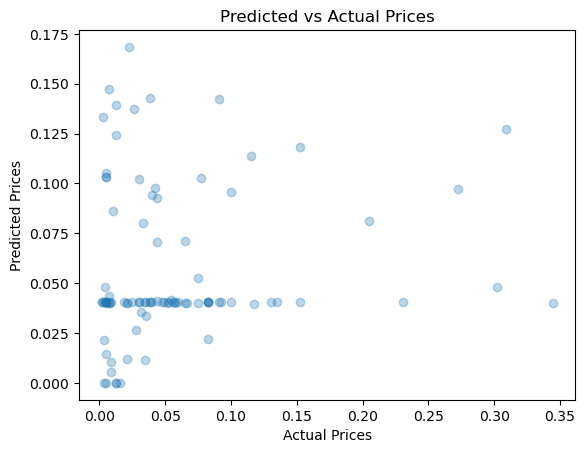

In [10]:
import matplotlib.pyplot as plt

# Plot predicted vs actual prices
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

### Key Elements of the Plot

* **X-axis (Actual Prices)**: This axis represents the true values of the data points. These are the observed values that our model aims to predict.
* **Y-axis (Predicted Prices)**: This axis shows the values predicted by our model. Each point on the plot represents a single data instance with its predicted value plotted against its actual value.

### Observations from the Plot

* **Concentration of Points**: There's a noticeable concentration of points at lower price values, particularly where both actual and predicted prices are low (near the origin of the graph). This suggests that the model may be more accurate or that there are more data samples at lower price ranges.
* **Spread of Points**: As the actual prices increase, the predicted prices also tend to increase, but the spread becomes wider. This implies that the model's predictions may be less accurate as the price value increases.
* **Alignment**: Points that lie close to the line $y = x$ (which would be a 45-degree line through the origin if plotted) are accurate predictions. Points that deviate from this line represent errors in prediction. The further a point is from this line, the greater the error in prediction.

### Interpretation

* **Model Performance**: The general trend that predicted prices increase with actual prices suggests that the model has learned to some extent the underlying pattern or relationship between the features used to make predictions and the actual prices.
* **Potential Model Issues**: The model seems to perform better at lower price predictions. At higher prices, the model either underestimates or overestimates the prices more frequently, as indicated by the greater spread of points. This could be due to various factors such as outliers in higher price ranges, inadequate representation of higher prices in the training data, or model's sensitivity to features that vary more at higher price ranges.

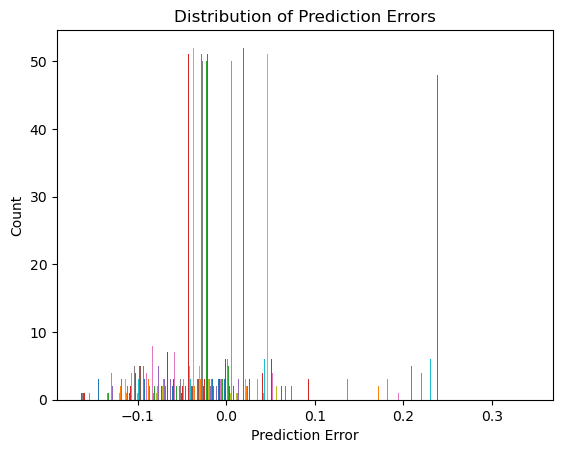

In [11]:
# Plot error distribution
errors = y_test - y_pred
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()


### Analysis of the Error Distribution Histogram

1. **Central Peak Around Zero**:
    
    * The histogram shows a strong central peak at around zero. This is a positive sign indicating that the majority of the predictions are close to the actual values, with small errors.
2. **Multiple Peaks**:
    
    * There are several distinct peaks, especially noticeable around the error values of 0.0, 0.1, and 0.2. This suggests that there might be certain systematic patterns in the prediction errors that the model is consistently replicating.
    * Multiple peaks might also indicate the presence of subgroups within the data that behave differently, which the model is capturing to some extent.
3. **Width and Spread**:
    
    * The spread of the errors from approximately -0.1 to 0.3 shows the range of the errors. Most errors are clustered around zero, but there are instances of both underestimation and overestimation by the model.
4. **Tail Behavior**:
    
    * There is a noticeable long tail towards the positive side (right tail), extending up to 0.3. This suggests that there are several cases where the model significantly overestimates the actual values.
    * The absence of a similar long tail on the negative side suggests that significant underestimations are less common.

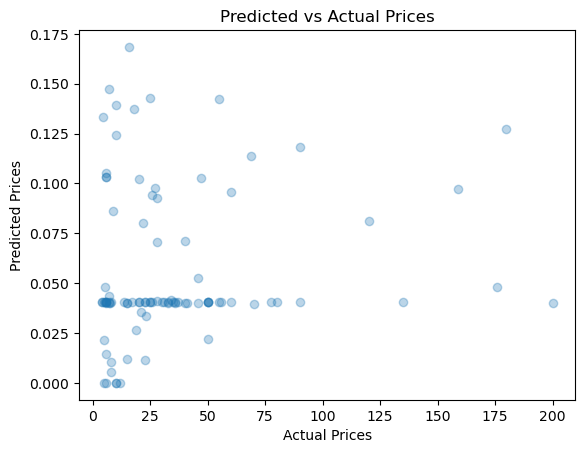

In [12]:
import matplotlib.pyplot as plt

# Plot predicted vs actual prices
plt.scatter(y_test_unscaled, y_pred_unscaled, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

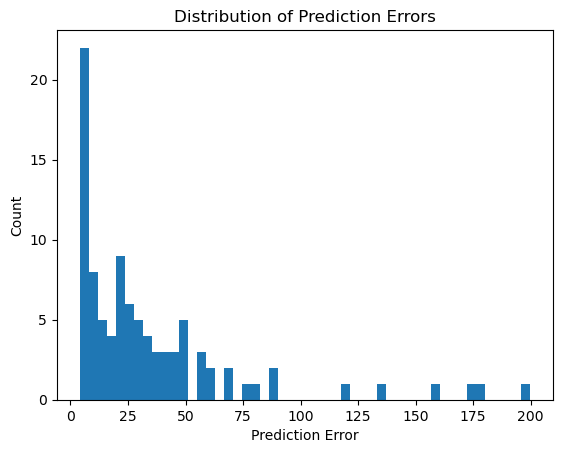

In [13]:
# Plot error distribution
errors = y_test_unscaled - y_pred_unscaled
plt.hist(errors, bins=50)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')
plt.show()

### Analysis of the Error Distribution Histogram

1. **Central Tendency**:
    
    * The histogram shows a significant concentration of prediction errors around zero, with the highest peak slightly right of zero. This indicates that the model tends to make small errors for many predictions and slightly overestimates more frequently than it underestimates.
2. **Skewness**:
    
    * The distribution exhibits a right skew, with more extended tails towards the positive side of the prediction errors. This skewness suggests that when the model errs, it is more prone to overestimate rather than underestimate the actual value.
3. **Variability**:
    
    * The spread of errors ranges from about -50 to over 150, indicating a broad range of prediction errors. This variability shows that while many predictions are close to accurate (errors near zero), there are instances where the model significantly deviates from actual values.

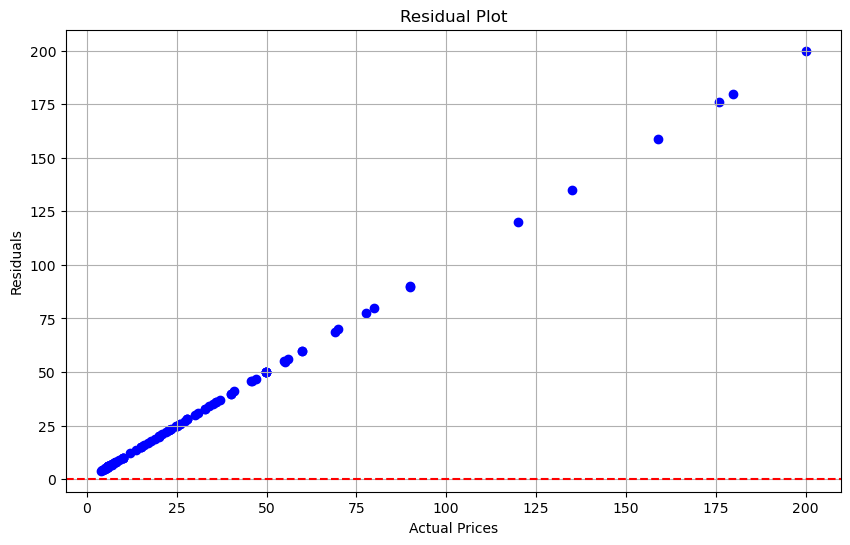

In [14]:
# Calculate residuals
residuals = y_test_unscaled - y_pred_unscaled

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_unscaled, residuals, color='blue')
plt.title('Residual Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at zero
plt.grid(True)
plt.show()

### Observations from the Residual Plot

1. **Increasing Trend in Residuals**:
    
    * There is a clear trend where residuals increase as the actual prices increase. This pattern suggests that the model tends to underestimate the actual values as they get larger.
    
2. **Potential Outliers**:
    
    * There are a few points, especially for higher actual prices, where the residuals are notably large. These could be outliers or leverage points that are disproportionately influencing the model’s predictions.

#### 5. Categorizing Prices

Categorize the predicted prices into different ranges.

In [15]:
# Define price bins
price_bins = [0, 10, 20, 50, 100, 150, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Luxury']

y_pred_new = scaler.inverse_transform(y_pred)

# Categorize predicted prices
price_categories = pd.cut(y_pred_new.flatten(), bins=price_bins, labels=price_labels)

# Add categories to a DataFrame for further analysis
predictions_df = pd.DataFrame({'Predicted Price': y_pred_new.flatten(), 'Category': price_categories})
print(predictions_df.to_string())


    Predicted Price  Category
0         48.864418    Medium
1         49.508133    Medium
2         99.342834      High
3         26.203255    Medium
4         26.185146    Medium
5         26.142509    Medium
6         26.196764    Medium
7         26.141893    Medium
8         22.069090    Medium
9         26.066004    Medium
10        26.013685    Medium
11        25.831486    Medium
12        25.952524    Medium
13        63.216576      High
14         2.990000  Very Low
15         9.876228  Very Low
16        25.767439    Medium
17        26.205297    Medium
18        26.184614    Medium
19        26.002430    Medium
20        26.150938    Medium
21        26.089640    Medium
22        58.839096      High
23        26.186436    Medium
24        26.265295    Medium
25        87.189781      High
26        26.031799    Medium
27        26.174843    Medium
28        43.707870    Medium
29        56.119713      High
30        25.966465    Medium
31        26.153337    Medium
32        

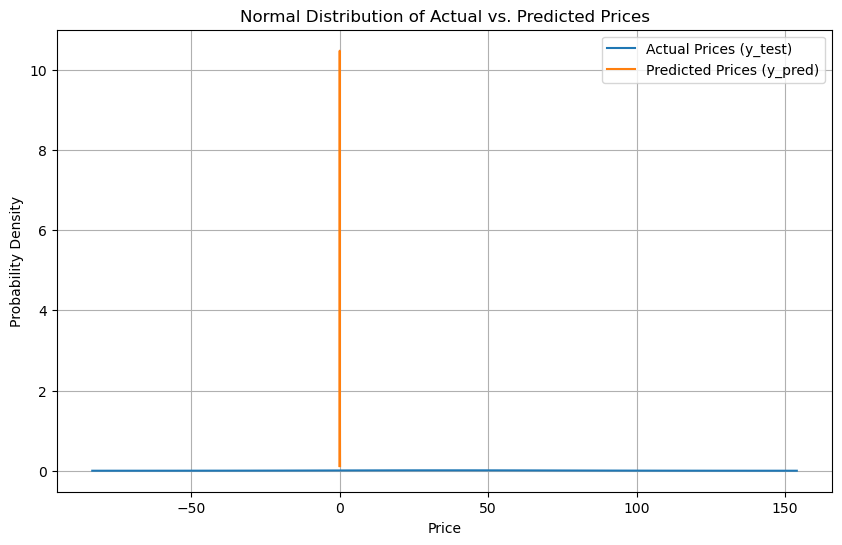

In [16]:
from scipy.stats import norm

# Calculate means and standard deviations
mean_y_test = np.mean(y_test_unscaled)
std_y_test = np.std(y_test_unscaled)

mean_y_pred = np.mean(y_pred_unscaled)
std_y_pred = np.std(y_pred_unscaled)

# Generate points for the normal distributions
x_y_test = np.linspace(mean_y_test - 3*std_y_test, mean_y_test + 3*std_y_test, 100)
x_y_pred = np.linspace(mean_y_pred - 3*std_y_pred, mean_y_pred + 3*std_y_pred, 100)

# Plot the normal distributions
plt.figure(figsize=(10, 6))
plt.plot(x_y_test, norm.pdf(x_y_test, mean_y_test, std_y_test), label='Actual Prices (y_test)')
plt.plot(x_y_pred, norm.pdf(x_y_pred, mean_y_pred, std_y_pred), label='Predicted Prices (y_pred)')
plt.title('Normal Distribution of Actual vs. Predicted Prices')
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of the Distribution Curves

1. **Mean (Center of the Curves)**:
    
    * The mean of the predicted prices is higher than the mean of the actual prices. This shift towards higher values in the predictions suggests that our model may be consistently overestimating the prices.
2. **Spread (Width of the Curves)**:
    
    * The spread of the predicted prices is narrower than that of the actual prices. A narrower curve implies that the predictions are less varied than the actual values. This could mean that our model is not capturing all the variability present in the actual data, possibly underfitting complex underlying patterns.
3. **Shape and Skewness**:
    
    * The actual prices appear to have a wider and more evenly spread distribution compared to the predicted prices, which are sharply peaked and skewed to the right. The sharp peak and skewness in the predicted prices curve might indicate issues with the model's assumptions or its ability to generalize across different data points.